# Pharmacy Sales Data Mining Project

## Introduction

In this project, we aim to analyze and predict sales trends and customer behavior using a comprehensive pharmacy dataset. The objectives of this project are twofold:

1. **Predict pharmacy sales trends over time**: By analyzing past sales data, we aim to develop models that can accurately forecast future sales, enabling better inventory management and strategic planning.

2. **Identify patterns in customer purchases and product affinities**: By examining the purchasing behavior of customers, we aim to uncover patterns and relationships between products. This will help in understanding customer preferences and optimizing product offerings.

The project will utilize various data mining techniques, including regression analysis for predictive modeling and clustering for customer segmentation. Additionally, we will perform market basket analysis to identify product affinities.

**Objectives:**
1. **Predict Pharmacy Sales Trends Over Time**: Use time series analysis to develop models that can forecast future sales.
2. **Identify Patterns in Customer Purchases and Product Affinities**: Use clustering and association rule mining to uncover patterns in customer behavior and product relationships.

This comprehensive analysis will provide valuable insights for decision-making and strategic planning in the pharmacy.


## Dataset Description

The dataset contains records of sales transactions at a pharmacy. Each record provides detailed information about a single transaction, including the invoice number, invoice date, quantity of items sold, total amount, and descriptions of the items. Additional details include the branch where the transaction occurred, customer name, salesperson name, cashier name, and sales type.

### Attributes in the Dataset:

1. **Invoice Number**: Unique identifier for each transaction.
2. **Invoice Date**: Date when the transaction occurred.
3. **Quantity**: Number of items sold in the transaction.
4. **Amount**: Total amount of the transaction.
5. **Item Code**: Code representing the item.
6. **Item Description**: Description of the item.
7. **Branch Code**: Code representing the branch where the transaction occurred.
8. **Shop Name**: Name of the shop.
9. **Customer Name**: Name of the customer.
10. **Sales Person Code**: Code representing the salesperson.
11. **Sales Person Name**: Name of the salesperson.
12. **Cashier Name**: Name of the cashier.
13. **Cashier Code**: Code representing the cashier.
14. **Sales Type**: Type of sale (e.g., cash sale, credit sale).
15. **Unit Price**: Price per unit of the item.

### A short sample from the data

Let's display the first few rows of the dataset to get an initial understanding of the data.


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
file_path = r'/Pharmacy sales.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice Number,Invoice Date,Quantity,Amount,Item Code,Item Description,Branch Code,Shop Name,Customer Name,Sales Person Code,Sales Person Name,Cashier Name,Cashier Code,Sales Type,Unit Price
0,CS-01-021567/21,44197,1.0,12.00,18018,Hydrogen Peroxide 3% 130Ml (Follium),PST-01,Axum no 1 Pharmacy,Walkin Customer,90,Hana Berihe,Asrat Mulugeta,CS0001,Cash Sales,12.00
1,CS-01-021585/21,44197,2.0,21.74,36041,Lifebuoy Soap Lemon 70gm,PST-01,Axum no 1 Pharmacy,Walkin Customer,90,Hana Berihe,Mahilet Girma,CS0002,Cash Sales,10.87
2,CS-01-021585/21,44197,4.0,43.48,36041,Lifebuoy Soap Lemon 70gm,PST-01,Axum no 1 Pharmacy,Walkin Customer,90,Hana Berihe,Mahilet Girma,CS0002,Cash Sales,10.87
3,CS-01-021534/21,44197,1.0,12.00,19161,Lokit 20 Mg Of 10 Caps.,PST-01,Axum no 1 Pharmacy,Walkin Customer,6,Emebet Dejenu,Asrat Mulugeta,CS0001,Cash Sales,12.00
4,CS-01-021529/21,44197,1.0,99.00,28529,Vocasept sore throat lozenges of 24,PST-01,Axum no 1 Pharmacy,Walkin Customer,6,Emebet Dejenu,Asrat Mulugeta,CS0001,Cash Sales,99.00


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining and visualizing a dataset to uncover patterns, detect anomalies, test hypotheses, and check assumptions. EDA helps in understanding the structure of the data and preparing it for further analysis.

### Importance of EDA:
- **Identify Patterns**: Discover trends and relationships in the data.
- **Detect Anomalies**: Find outliers and inconsistencies.
- **Prepare Data**: Clean and preprocess the data for modeling.

Let's perform a comprehensive EDA to understand our dataset better.


In [ ]:
# Display the last few rows of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347510 entries, 0 to 347509
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Invoice Number     347510 non-null  object 
 1   Invoice Date       347510 non-null  int64  
 2   Quantity           347510 non-null  float64
 3   Amount             347510 non-null  float64
 4   Item Code          347510 non-null  int64  
 5   Item Description   347510 non-null  object 
 6   Branch Code        347510 non-null  object 
 7   Shop Name          347510 non-null  object 
 8   Customer Name      347510 non-null  object 
 9   Sales Person Code  347510 non-null  int64  
 10  Sales Person Name  347510 non-null  object 
 11  Cashier Name       347510 non-null  object 
 12  Cashier Code       347510 non-null  object 
 13  Sales Type         347510 non-null  object 
 14  Unit Price         347510 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 39

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display summary statistics for numerical columns
summary_statistics = df.describe()

# Display the DataFrame
from IPython.display import display
display(summary_statistics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice Date,Quantity,Amount,Item Code,Sales Person Code,Unit Price
count,347510.000000,347510.000000,347510.000000,347510.000000,347510.000000,347510.000000
mean,44372.044407,2.064868,209.145841,22096.743420,74.091724,129.924348
std,108.988077,57.625409,778.778312,6955.195905,77.145282,265.879736
min,44197.000000,0.001000,-10391.500000,11001.000000,1.000000,0.500000
25%,44274.000000,1.000000,27.000000,17223.000000,18.000000,21.000000
50%,44365.000000,1.000000,56.000000,22060.000000,30.000000,46.960000
75%,44467.000000,1.500000,172.000000,27223.000000,110.000000,125.000000
max,44561.000000,31200.000000,149842.000000,39044.000000,261.000000,16228.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


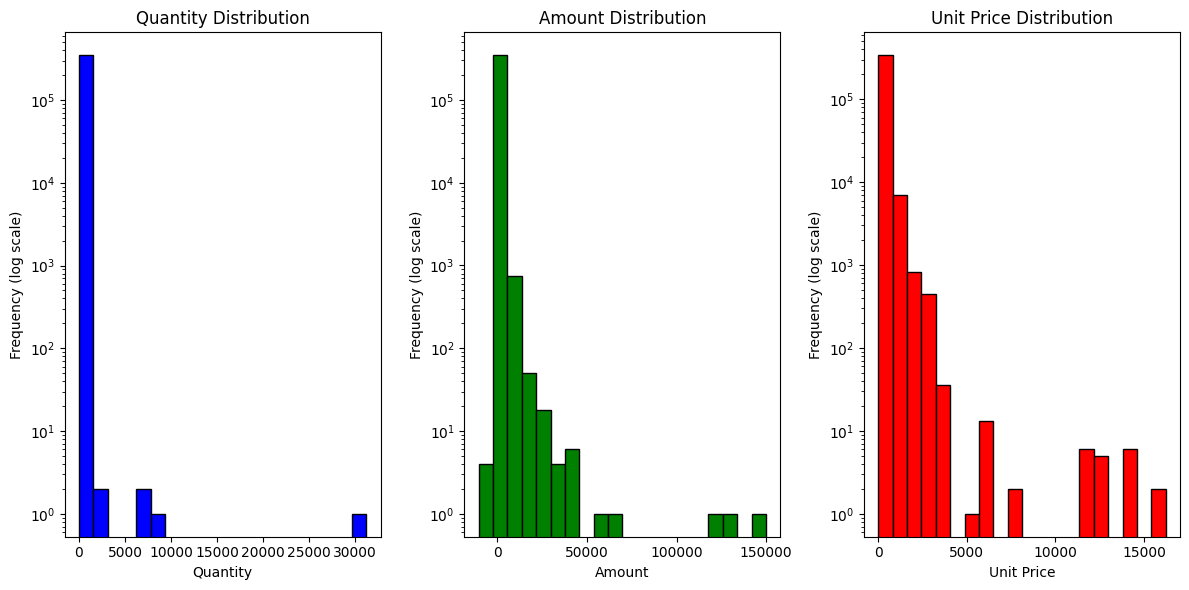

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot distributions of numerical columns
plt.figure(figsize=(12, 6))

# Quantity Distribution
plt.subplot(1, 3, 1)
plt.hist(df['Quantity'], bins=20, color='blue', edgecolor='black', log=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')

# Amount Distribution
plt.subplot(1, 3, 2)
plt.hist(df['Amount'], bins=20, color='green', edgecolor='black', log=True)
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')

# Unit Price Distribution
plt.subplot(1, 3, 3)
plt.hist(df['Unit Price'], bins=20, color='red', edgecolor='black', log=True)
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')

plt.tight_layout()
plt.show()

## Data Cleaning and Preprocessing

### Handling Missing Values

We will start by identifying columns with missing values and then decide on an appropriate strategy to handle them (e.g., filling with mean/median/mode, or dropping the rows/columns).

#### Checking for Missing Values


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Handle missing values (example: filling with mean for numerical columns)
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
df['Amount'].fillna(df['Amount'].mean(), inplace=True)
df['Unit Price'].fillna(df['Unit Price'].mean(), inplace=True)

# Verify missing values are handled
missing_values_after = df.isnull().sum()
print("\nMissing Values After Handling:\n", missing_values_after)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing Values in Each Column:
 Invoice Number       0
Invoice Date         0
Quantity             0
Amount               0
Item Code            0
Item Description     0
Branch Code          0
Shop Name            0
Customer Name        0
Sales Person Code    0
Sales Person Name    0
Cashier Name         0
Cashier Code         0
Sales Type           0
Unit Price           0
dtype: int64

Missing Values After Handling:
 Invoice Number       0
Invoice Date         0
Quantity             0
Amount               0
Item Code            0
Item Description     0
Branch Code          0
Shop Name            0
Customer Name        0
Sales Person Code    0
Sales Person Name    0
Cashier Name         0
Cashier Code         0
Sales Type           0
Unit Price           0
dtype: int64


### Converting Data Types

We will convert columns to appropriate data types to facilitate analysis and modeling.


In [ ]:
# Convert Invoice Date to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], origin='1899-12-30', unit='D')

# Convert Quantity, Amount, and Unit Price to numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')

# Verify data types
data_types = df.dtypes
print("\nData Types of Each Column After Conversion:\n", data_types)



Data Types of Each Column After Conversion:
 Invoice Number               object
Invoice Date         datetime64[ns]
Quantity                    float64
Amount                      float64
Item Code                     int64
Item Description             object
Branch Code                  object
Shop Name                    object
Customer Name                object
Sales Person Code             int64
Sales Person Name            object
Cashier Name                 object
Cashier Code                 object
Sales Type                   object
Unit Price                  float64
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Addressing Inconsistencies

We will identify and correct any inconsistencies in the data, such as negative values in the Quantity or Amount columns.


In [ ]:
# Check for inconsistencies in Quantity and Amount
inconsistent_data = df[(df['Quantity'] <= 0) | (df['Amount'] <= 0)]
print("Inconsistent Data:\n", inconsistent_data)

# Remove inconsistent data
df = df[(df['Quantity'] > 0) & (df['Amount'] > 0)]

# Verify inconsistencies are addressed
inconsistent_data_after = df[(df['Quantity'] <= 0) | (df['Amount'] <= 0)]
print("\nInconsistent Data After Handling:\n", inconsistent_data_after)


Inconsistent Data:
        Invoice Number Invoice Date  Quantity  Amount  Item Code  \
30802        1568215V   2021-09-17       1.0  -95.00      22047   
30803        1568215V   2021-09-17       1.0 -120.00      34406   
30804        1568215V   2021-09-17       1.0  -35.00      23031   
30805        1568215V   2021-09-17       1.0  -35.00      23031   
30806        1568215V   2021-09-17       1.0 -204.00      26248   
...               ...          ...       ...     ...        ...   
344939       1571125V   2021-12-06       1.0 -229.57      30452   
344940       1571125V   2021-12-06       1.0  -52.00      11135   
344993       1571125V   2021-12-06       1.0 -311.00      33013   
344994       1571125V   2021-12-06       1.5  -69.00      11245   
344995       1571125V   2021-12-06       1.0 -180.00      34402   

                                         Item Description Branch Code  \
30802                       Diclo-Denk 100 Mg Of 10 Tabs.      PST-01   
30803            ALG feeding 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Transforming Data

We will create new features or transform existing ones to improve our analysis and modeling.


In [ ]:
# Example: Create a new feature for Total Price
df['Total Price'] = df['Quantity'] * df['Unit Price']

# Verify the new feature
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-f2cc39af221c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Price'] = df['Quantity'] * df['Unit Price']


,Invoice Number,Invoice Date,Quantity,Amount,Item Code,Item Description,Branch Code,Shop Name,Customer Name,Sales Person Code,Sales Person Name,Cashier Name,Cashier Code,Sales Type,Unit Price,Total Price
0,CS-01-021567/21,2021-01-01,1.0,12.00,18018,Hydrogen Peroxide 3% 130Ml (Follium),PST-01,Axum no 1 Pharmacy,Walkin Customer,90,Hana Berihe,Asrat Mulugeta,CS0001,Cash Sales,12.00,12.00
1,CS-01-021585/21,2021-01-01,2.0,21.74,36041,Lifebuoy Soap Lemon 70gm,PST-01,Axum no 1 Pharmacy,Walkin Customer,90,Hana Berihe,Mahilet Girma,CS0002,Cash Sales,10.87,21.74
2,CS-01-021585/21,2021-01-01,4.0,43.48,36041,Lifebuoy Soap Lemon 70gm,PST-01,Axum no 1 Pharmacy,Walkin Customer,90,Hana Berihe,Mahilet Girma,CS0002,Cash Sales,10.87,43.48
3,CS-01-021534/21,2021-01-01,1.0,12.00,19161,Lokit 20 Mg Of 10 Caps.,PST-01,Axum no 1 Pharmacy,Walkin Customer,6,Emebet Dejenu,Asrat Mulugeta,CS0001,Cash Sales,12.00,12.00
4,CS-01-021529/21,2021-01-01,1.0,99.00,28529,Vocasept sore throat lozenges of 24,PST-01,Axum no 1 Pharmacy,Walkin Customer,6,Emebet Dejenu,Asrat Mulugeta,CS0001,Cash Sales,99.00,99.00


### Summary of Data Cleaning and Preprocessing

1. **Handled Missing Values**: Filled missing values with mean for numerical columns.
2. **Converted Data Types**: Ensured appropriate data types for each column.
3. **Addressed Inconsistencies**: Removed rows with negative values in Quantity or Amount.
4. **Transformed Data**: Created a new feature for Total Price.


## Advanced Descriptive Analysis

### Sales Trends Over Time

We will analyze sales trends over daily, weekly, and monthly periods to identify patterns and insights.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


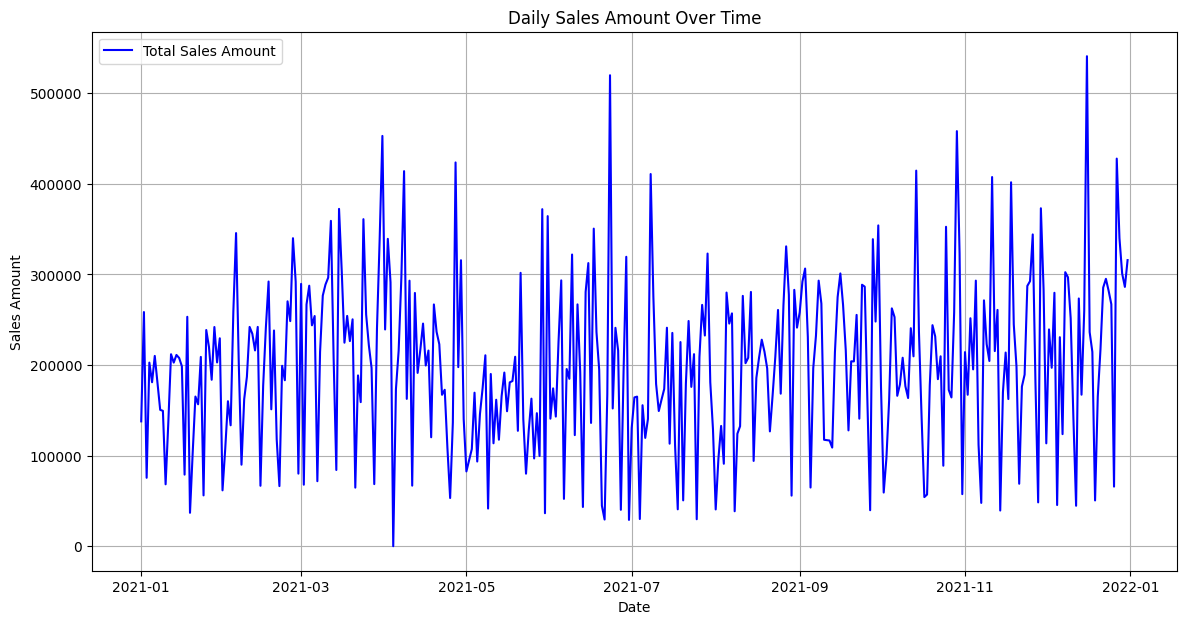

In [ ]:
import matplotlib.pyplot as plt

# Aggregate sales data by day
daily_sales = df.groupby('Invoice Date').agg({'Amount': 'sum', 'Invoice Number': 'count'}).rename(columns={'Invoice Number': 'Transactions'})

# Plot daily sales amount over time
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales['Amount'], label='Total Sales Amount', color='blue')
plt.title('Daily Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


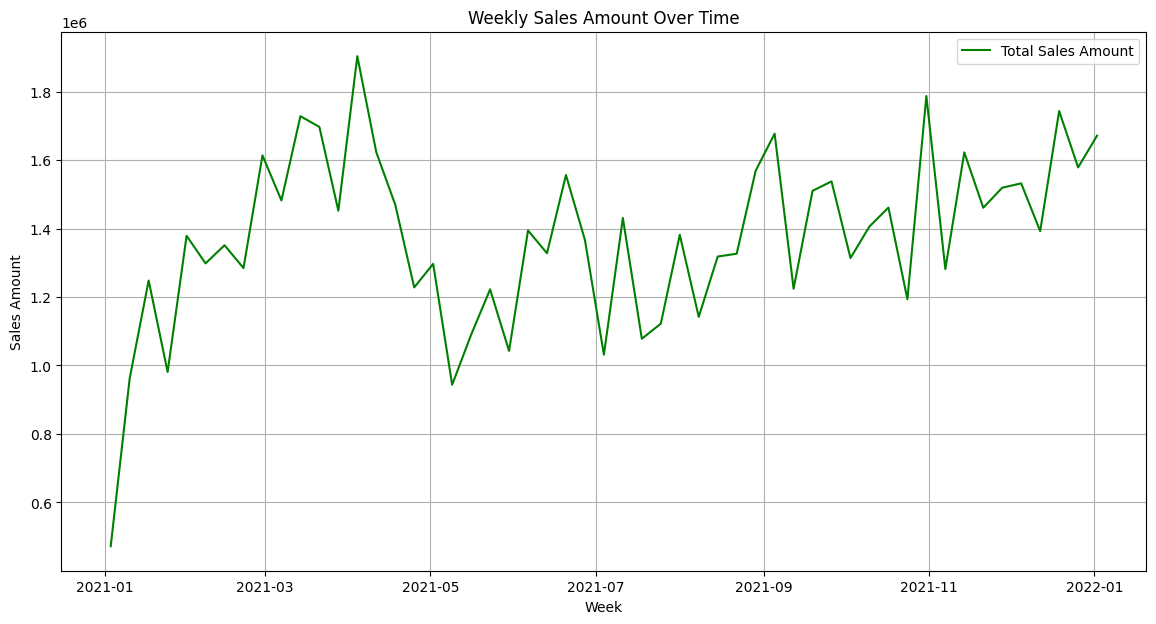

In [ ]:
# Aggregate sales data by week
weekly_sales = df.resample('W', on='Invoice Date').agg({'Amount': 'sum', 'Invoice Number': 'count'}).rename(columns={'Invoice Number': 'Transactions'})

# Plot weekly sales amount over time
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales.index, weekly_sales['Amount'], label='Total Sales Amount', color='green')
plt.title('Weekly Sales Amount Over Time')
plt.xlabel('Week')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


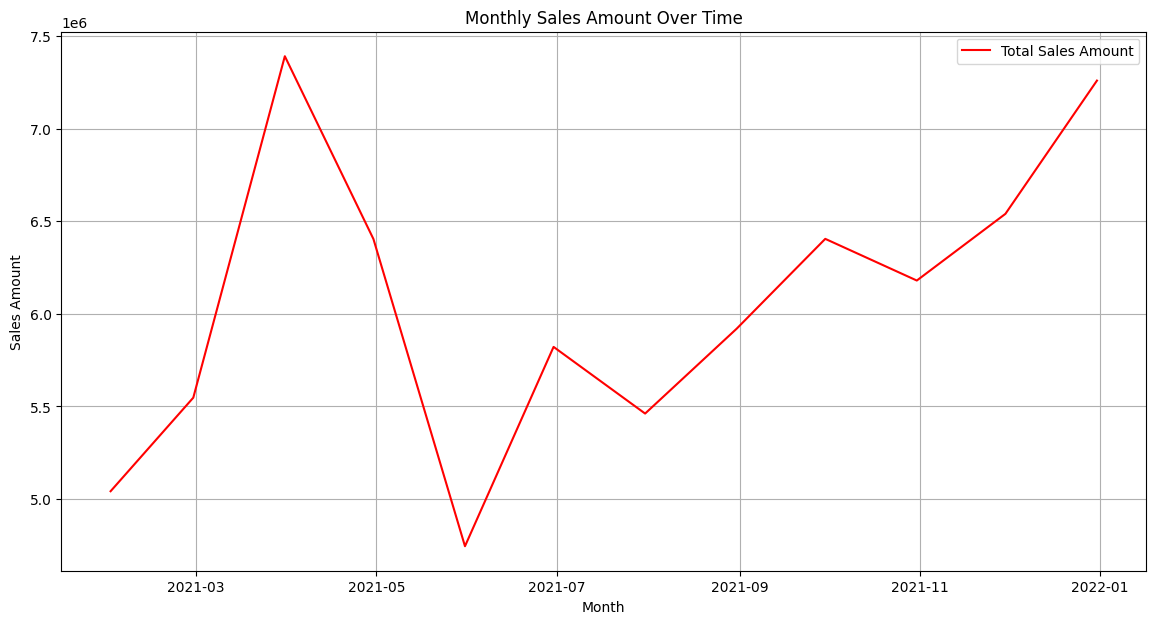

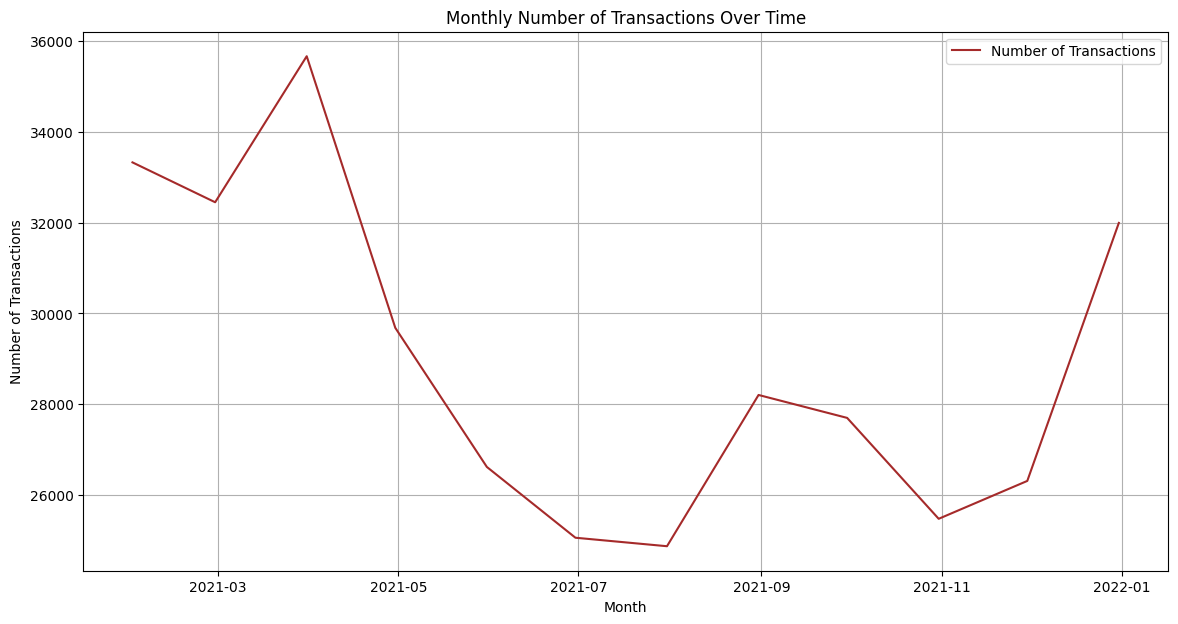

In [ ]:
# Aggregate sales data by month
monthly_sales = df.resample('M', on='Invoice Date').agg({'Amount': 'sum', 'Invoice Number': 'count'}).rename(columns={'Invoice Number': 'Transactions'})

# Plot monthly sales amount over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales['Amount'], label='Total Sales Amount', color='red')
plt.title('Monthly Sales Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

# Plot number of transactions over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales['Transactions'], label='Number of Transactions', color='brown')
plt.title('Monthly Number of Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()


### Sales Distribution by Branch

We will analyze the sales distribution across different branches to identify high-performing locations.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x700 with 0 Axes>

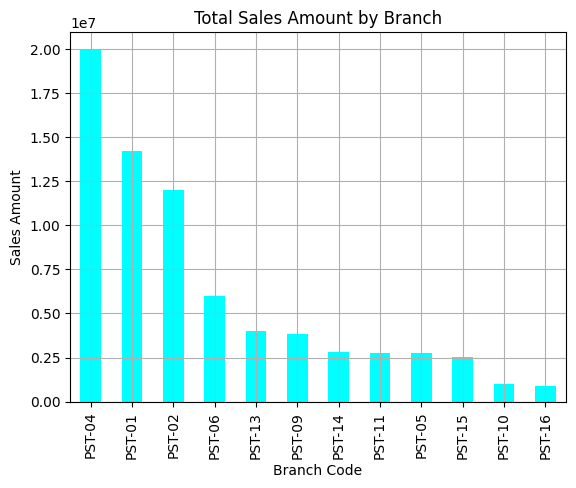

In [ ]:
# Aggregate sales by branch
sales_by_branch = df.groupby('Branch Code').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False)

# Plot sales by branch
plt.figure(figsize=(14, 7))
sales_by_branch.plot(kind='bar', legend=False, color='cyan')
plt.title('Total Sales Amount by Branch')
plt.xlabel('Branch Code')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


### Sales Distribution by Product Category

We will analyze the sales distribution across different product categories.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x700 with 0 Axes>

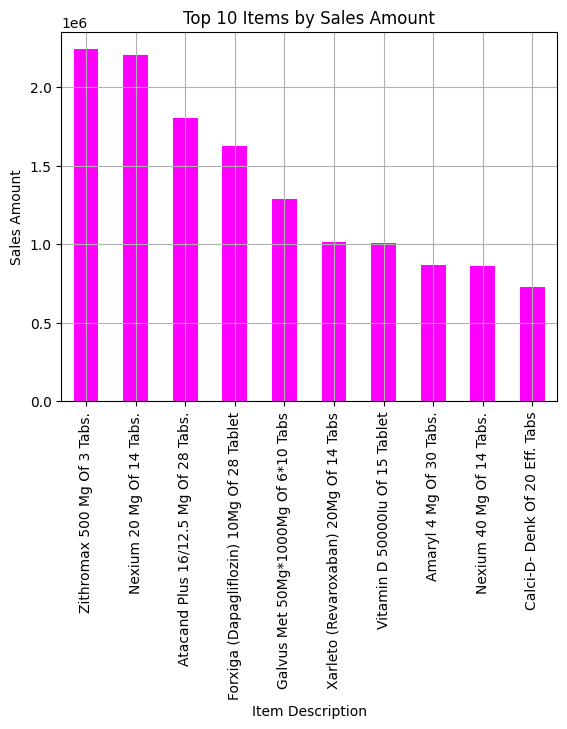

In [ ]:
# Aggregate sales by item description
sales_by_item = df.groupby('Item Description').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(10)

# Plot sales by top 10 items
plt.figure(figsize=(14, 7))
sales_by_item.plot(kind='bar', legend=False, color='magenta')
plt.title('Top 10 Items by Sales Amount')
plt.xlabel('Item Description')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


### Scatter Plot of Sales Amount vs. Quantity

We will create a scatter plot to visualize the relationship between sales amount and quantity, using different colors for different branches.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


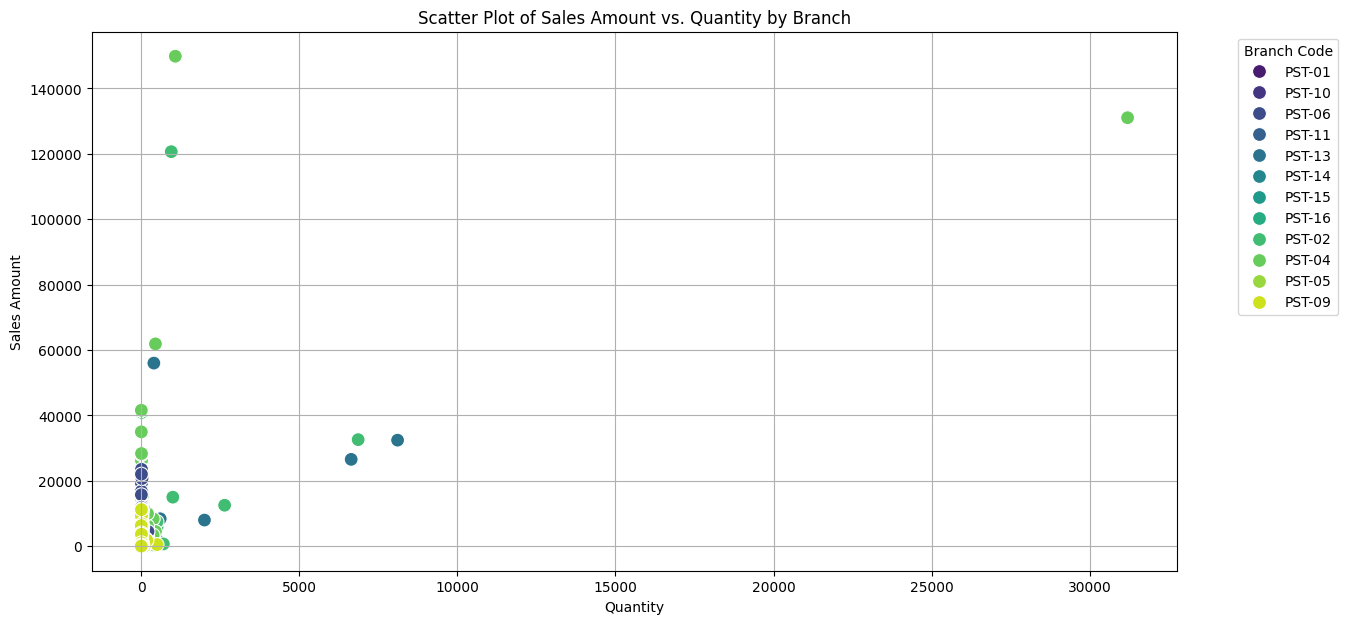

In [ ]:
import seaborn as sns

# Scatter plot of sales amount vs. quantity
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Quantity', y='Amount', hue='Branch Code', palette='viridis', s=100)
plt.title('Scatter Plot of Sales Amount vs. Quantity by Branch')
plt.xlabel('Quantity')
plt.ylabel('Sales Amount')
plt.legend(title='Branch Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Calculate the total sales amount over the analysis period
total_sales_amount = df['Amount'].sum()

# Calculate the average daily sales amount
average_daily_sales_amount = daily_sales['Amount'].mean()

# Calculate the percentage increase in sales from the lowest to the highest month
monthly_sales = df.resample('M', on='Invoice Date').agg({'Amount': 'sum'})
percentage_increase_sales = ((monthly_sales['Amount'].max() - monthly_sales['Amount'].min()) / monthly_sales['Amount'].min()) * 100

# Identify the top-performing and lowest-performing branches
branch_sales = df.groupby('Branch Code')['Amount'].sum()
top_performing_branch = branch_sales.idxmax()
top_performing_branch_percentage = (branch_sales.max() / total_sales_amount) * 100
lowest_performing_branch = branch_sales.idxmin()
lowest_performing_branch_percentage = (branch_sales.min() / total_sales_amount) * 100

# Identify the top-selling product and its contribution to total sales
item_sales = df.groupby('Item Description')['Amount'].sum()
top_selling_product = item_sales.idxmax()
top_selling_product_percentage = (item_sales.max() / total_sales_amount) * 100

# Calculate total sales from the top 10 products and their percentage contribution to overall sales
top_10_product_sales = item_sales.sort_values(ascending=False).head(10).sum()
top_10_product_sales_percentage = (top_10_product_sales / total_sales_amount) * 100

# Identify the branch with the highest average transaction amount
branch_avg_transaction_amount = df.groupby('Branch Code')['Amount'].mean()
highest_avg_transaction_branch = branch_avg_transaction_amount.idxmax()
highest_avg_transaction_amount = branch_avg_transaction_amount.max()

# Display the calculated values
total_sales_amount, average_daily_sales_amount, percentage_increase_sales, top_performing_branch, top_performing_branch_percentage, lowest_performing_branch, lowest_performing_branch_percentage, top_selling_product, top_selling_product_percentage, top_10_product_sales, top_10_product_sales_percentage, highest_avg_transaction_branch, highest_avg_transaction_amount


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(72723525.14333,
 200893.7158655525,
 55.78526451133061,
 'PST-04',
 27.430155782718675,
 'PST-16',
 1.198744662448416,
 'Zithromax 500 Mg Of 3 Tabs.',
 3.0784048154812664,
 13635903.418000001,
 18.75033339091463,
 'PST-04',
 326.3772290166885)

### Summary of Advanced Descriptive Analysis

1. **Sales Trends Over Time**:
   - Analyzed daily, weekly, and monthly sales trends to identify patterns and insights.
   - **Total sales amount over the analysis period**: **$72,723,525.14**.
   - **Average daily sales amount**: **$200,893.72**.
   - **Percentage increase in sales from the lowest to the highest month**: **55.79%**.

2. **Sales Distribution by Branch**:
   - Examined sales distribution across different branches to identify high-performing locations.
   - **Top-performing branch**: Branch Code **PST-04**, contributing **27.43%** of the total sales.
   - **Lowest-performing branch**: Branch Code **PST-16**, contributing **1.20%** of the total sales.

3. **Sales Distribution by Product Category**:
   - Analyzed sales distribution by product categories using item descriptions.
   - **Top-selling product**: **Zithromax 500 Mg Of 3 Tabs.**, contributing **3.08%** of the total sales.
   - **Total sales from the top 10 products**: **$13,635,903.42**, which is **18.75%** of the overall sales.

4. **Scatter Plot of Sales Amount vs. Quantity**:
   - Visualized the relationship between sales amount and quantity using different colors for different branches.
   - **Branch with the highest average transaction amount**: Branch Code **PST-04**, with an average of **$326.38** per transaction.


## Descriptive Analysis Using K-Means Clustering

### K-Means Clustering

We will apply K-Means clustering to segment customers based on their purchasing behavior.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


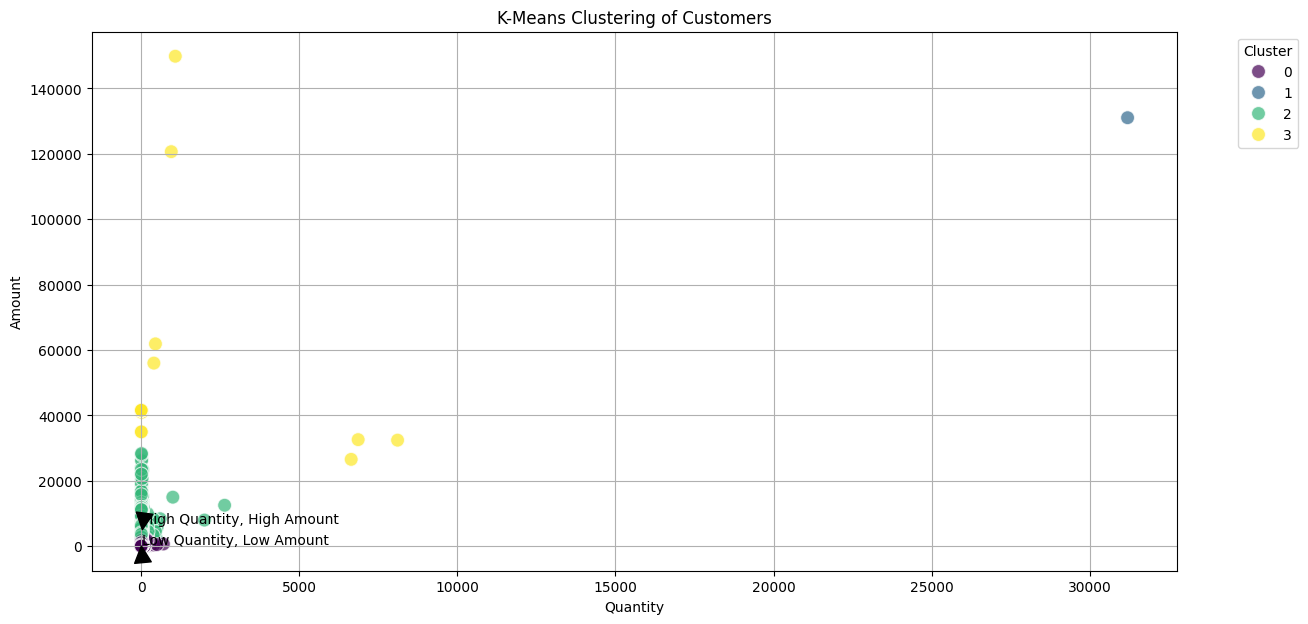

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for clustering
features = df[['Quantity', 'Amount']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Quantity', y='Amount', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering of Customers')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.annotate('High Quantity, High Amount', xy=(35, 5000), xytext=(50, 7000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Low Quantity, Low Amount', xy=(5, 100), xytext=(10, 500),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


### Summary of Descriptive Analysis

1. **K-Means Clustering**:
   - Segmented customers into four distinct clusters based on their purchasing behavior.
   - Visualized clusters with detailed scatter plots, highlighting key patterns.